In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import lognorm,norm

import emcee
import corner

In [2]:
mags = np.array([ 16.17320061,  16.31529999,  16.36009979,  16.46339989,
        16.53470039,  16.62319946,  16.66670036,  16.67709923,
        17.08110046,  17.51420021,  17.63540077,  17.70739937,
        17.75869942,  17.79570007,  17.82780075,  17.83460045,
        17.9008007 ,  17.97190094,  18.06819916,  18.07069969,
        18.18050003,  18.19059944,  18.24379921,  18.28989983,
        18.34329987,  18.43889999,  18.45910072,  18.61569977,
        18.62870026,  18.74510002,  18.80349922,  18.91189957,
        18.9326992 ,  18.93969917,  18.9946003 ,  19.09539986,
        19.14550018,  19.16880035,  19.17099953,  19.20350075,
        19.31380081,  19.32480049,  19.34790039,  19.40670013,
        19.43449974,  19.51420021,  19.54759979,  19.55279922,
        19.60219955,  19.68770027,  19.78739929,  19.82799911,
        19.82920074,  19.92740059,  19.93190002,  19.93720055,
        19.9503994 ,  19.96380043,  20.00390053,  20.01639938,
        20.04649925,  20.06739998,  20.07559967,  20.08110046,
        20.14119911,  20.26029968,  20.26580048,  20.27129936,
        20.30050087,  20.30620003,  20.31130028,  20.31990051,
        20.47610092,  20.58309937,  20.65940094,  20.68330002,
        20.71949959,  20.74230003,  20.75160027,  20.75559998,
        20.77179909,  20.78630066,  20.79330063,  20.81909943,
        20.87800026,  20.88979912,  20.90469933,  20.90530014,
        20.9137001 ,  20.91550064,  20.91659927,  20.9204998 ,
        20.95170021,  20.95289993,  20.95429993,  20.97019958,
        20.98740005,  20.98970032])
diff = np.array([ 0.03765501,  0.04801651,  0.00122427,  0.03875266,  0.0987162 ,
       -0.00206218,  0.04611802, -0.01312784,  0.01321306, -0.00483971,
        0.00076101,  0.01169353, -0.13229451,  0.10127433, -0.03739667,
        0.11336513,  0.07385686, -0.04204073, -0.00335713, -0.03246441,
       -0.13208832,  0.10010185,  0.03073497,  0.03410149,  0.06533329,
        0.0427837 ,  0.10139461, -0.04709481, -0.01352095, -0.04008429,
        0.08886115, -0.028328  , -0.04802187, -0.04328513, -0.12730606,
        0.02142302, -0.01434654,  0.0458342 , -0.22374888, -0.10964841,
       -0.078778  , -0.0167922 ,  0.0468981 , -0.00478339, -0.1072231 ,
       -0.17323041,  0.1168672 , -0.10610591, -0.02063802,  0.07520994,
        0.03685617, -0.05759104,  0.10568673,  0.00510219, -0.02182539,
       -0.0560446 , -0.00056239,  0.07410696,  0.09186222,  0.10081225,
       -0.22440713,  0.13787982,  0.05957753,  0.15234795, -0.15591615,
       -0.13552273,  0.07914023,  0.16837689,  0.02916976,  0.0829254 ,
       -0.02732336, -0.01098174,  0.05571092,  0.10198031,  0.01376139,
        0.03281278, -0.01872262,  0.02707203, -0.10331538,  0.01304031,
       -0.06367923, -0.05121474,  0.07977627,  0.09910386, -0.07750027,
       -0.10034663, -0.04570873, -0.14601343, -0.12067828,  0.09123925,
       -0.08334747, -0.12568984,  0.19642409, -0.06455699, -0.14663695,
        0.13322606, -0.05942857,  0.09861079])
e_diff = np.array([ 0.00442866,  0.00303952,  0.0036567 ,  0.002953  ,  0.00612712,
        0.00790812,  0.00301171,  0.00490176,  0.00681488,  0.00576384,
        0.00370725,  0.03146758,  0.00878001,  0.0088267 ,  0.01022559,
        0.29056867,  0.03130043,  0.0060187 ,  0.04132157,  0.02296683,
        0.0145712 ,  0.07413137,  0.06922335,  0.04197194,  0.01962986,
        0.03492395,  0.01177392,  0.01700629,  0.11742677,  0.01664941,
        0.10989908,  0.03468801,  0.24112663,  0.10055917,  0.0592627 ,
        0.17926581,  0.02279725,  0.01944829,  0.02520531,  0.02848873,
        0.16111508,  0.2438291 ,  0.02126673,  0.03155423,  0.26592107,
        0.26625956,  0.06871278,  0.03119145,  0.04454328,  0.03355782,
        0.08239629,  0.09241086,  0.14723479,  0.1936613 ,  0.10570278,
        0.05886063,  0.2687522 ,  0.04852128,  0.26036112,  0.28716741,
        0.12502775,  0.09024899,  0.16069676,  0.08908538,  0.13419376,
        0.03427357,  0.16183947,  0.04253255,  0.04850359,  0.0758688 ,
        0.26602795,  0.05942181,  0.06763789,  0.29156977,  0.05675527,
        0.10877185,  0.16820844,  0.287456  ,  0.0583916 ,  0.10721497,
        0.18489732,  0.08538481,  0.20501363,  0.14387422,  0.14262716,
        0.12698662,  0.17353071,  0.15967743,  0.09239031,  0.08554111,
        0.17487003,  0.10485116,  0.11388373,  0.07697607,  0.05811356,
        0.30962413,  0.10020261,  0.13108016])

In [3]:
# generate points given parameters ZP and e_ZP
def dosample(theta):
    ZP, e_ZP = theta
    return ZP + np.random.randn(len(e_diff)) * e_diff + np.random.randn(len(e_diff)) * e_ZP

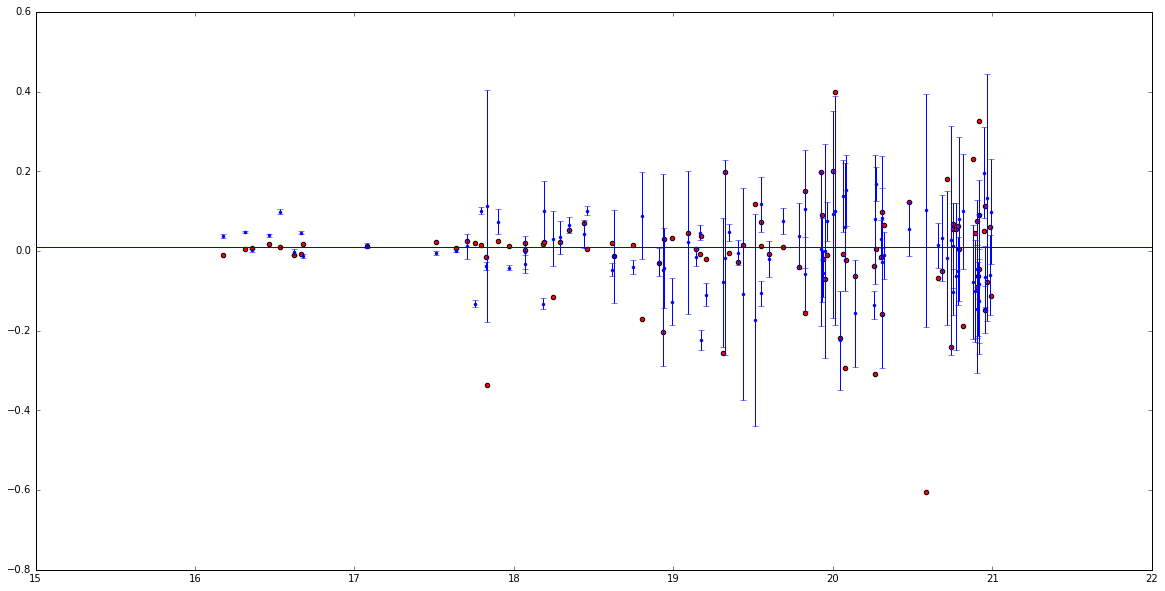

In [4]:
# plot an example
fig, ax = plt.subplots(figsize = (20, 10))
ax.errorbar(mags, diff, yerr = e_diff, marker = '.', lw = 0, elinewidth = 1)
ax.scatter(mags, dosample([0.01, 0.01]), c = 'r')
ax.axhline(0.01)

In [5]:
# estimate ZP and e_ZP using the median and bootstrap
ZPguess = np.median(diff)
ZPs = []
for i in range(100):
    ZPs.append(np.median(np.random.choice(diff, size = len(diff))))
e_ZPguess = np.std(ZPs)
print ZPguess, e_ZPguess

9.931e-05 0.0106955555915


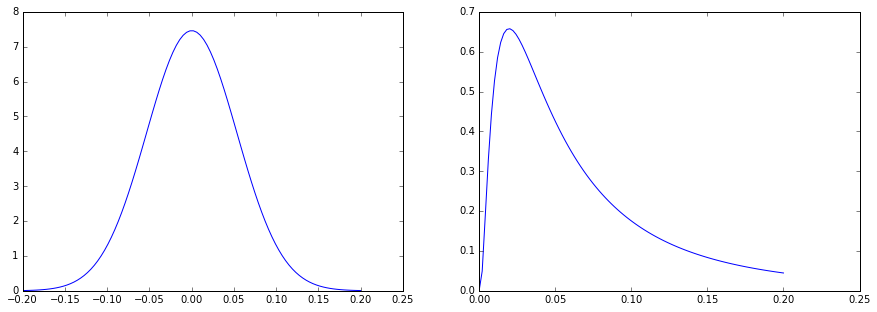

In [6]:
# Priors
def priorZP(ZP):
    return norm.pdf(ZP, loc = ZPguess, scale = 5 * e_ZPguess)
def priore_ZP(e_ZP):
    return lognorm.pdf(e_ZP / (5. * e_ZPguess), 1)
fig, ax = plt.subplots(ncols = 2, figsize = (15, 5))
ZPs = np.linspace(-0.2, 0.2, 100)
ax[0].plot(ZPs, priorZP(ZPs))
e_ZPs = np.linspace(0, 0.2, 100)
ax[1].plot(e_ZPs, priore_ZP(e_ZPs))

In [7]:
# log likelihood of the data given the model parameters
def lnlike(theta, y, yerr):
    
    ymodel = dosample(theta)
    
    return -0.5 * np.sum(((ymodel - y) / yerr)**2)

# prior likelihood of the parameters theta
def lnprior(theta):
    
    (ZP, e_ZP) = theta
    return np.log(priorZP(ZP) * priore_ZP(e_ZP))

def lnprob(theta, y, yerr):
    
    lp = lnprior(theta)
    lnprob = lp + lnlike(theta, y, yerr)

    return lnprob

In [8]:
# initialize seeds
result = {}
result["x"] = [ZPguess, e_ZPguess]
ndim, nwalkers = len(result['x']), 100
pos = [result["x"] + 1e-2 * np.random.randn(ndim) for i in range(nwalkers)]
labels = ['ZP', 'e_ZP']

# MCMC
nsteps = 2000
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(diff, e_diff))
%time sampler.run_mcmc(pos, nsteps)

/home/fforster/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log
/home/fforster/miniconda2/lib/python2.7/site-packages/emcee-2.2.1-py2.7.egg/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
/home/fforster/miniconda2/lib/python2.7/site-packages/emcee-2.2.1-py2.7.egg/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater


CPU times: user 1min 38s, sys: 4 ms, total: 1min 38s
Wall time: 1min 38s


(array([[ 0.01788718,  0.00993339],
        [ 0.02578194,  0.02136232],
        [ 0.01673204,  0.00830502],
        [ 0.01463113,  0.02398147],
        [ 0.01226933,  0.01761378],
        [ 0.01581215,  0.02173742],
        [ 0.00221267,  0.02191741],
        [ 0.02358231,  0.01620748],
        [ 0.01251388,  0.01565841],
        [ 0.0060151 ,  0.02511404],
        [ 0.01786136,  0.01784034],
        [ 0.01947488,  0.01150312],
        [ 0.00976969,  0.01336862],
        [ 0.01257764,  0.01267177],
        [ 0.01832914,  0.01305438],
        [-0.00566988,  0.02538486],
        [ 0.0122196 ,  0.01210141],
        [ 0.01093436,  0.01147907],
        [ 0.01906998,  0.01320082],
        [ 0.01058192,  0.01780651],
        [ 0.01334053,  0.01612364],
        [ 0.01091458,  0.01269973],
        [ 0.01852754,  0.0147534 ],
        [ 0.00859837,  0.0164491 ],
        [-0.00396735,  0.01246356],
        [ 0.01433455,  0.01181715],
        [ 0.00826322,  0.02843563],
        [ 0.01222983,  0.026

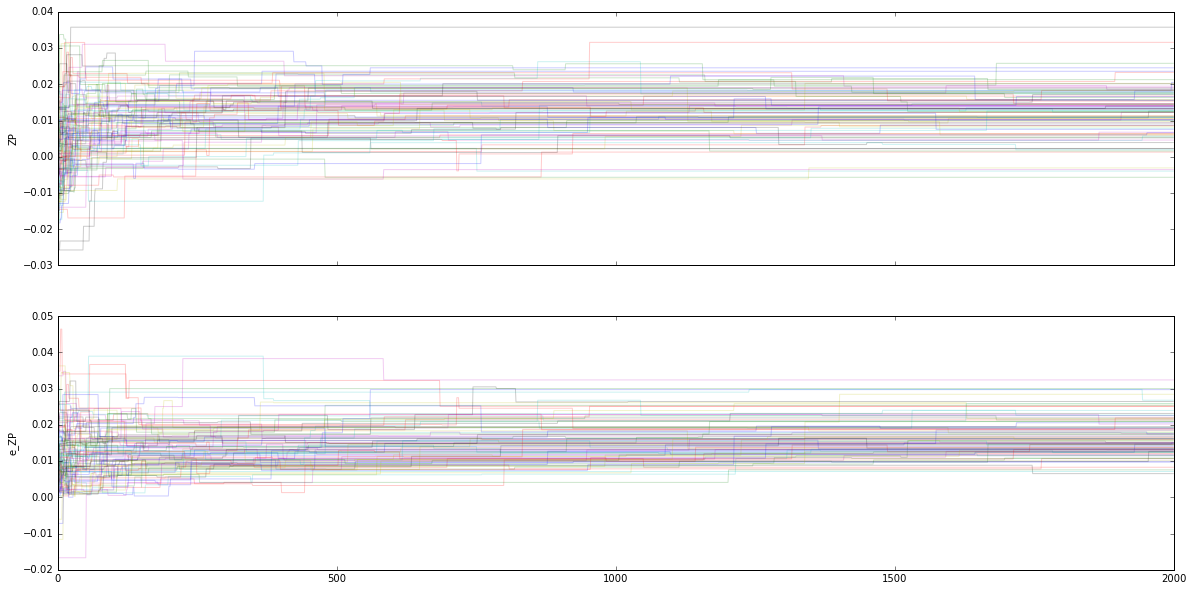

In [9]:
# plot evolution of parameters to check for stationarity and burn in length
fig, ax = plt.subplots(nrows = ndim, sharex = True, figsize = (20, 10))
for j in range(ndim):
    ax[j].set_ylabel(labels[j])
    for i in range(nwalkers):
        ax[j].plot(sampler.chain[i, :, j], alpha = 0.2)     

MCMC guess:
ZP: 0.012788 (0.005430, 0.018928)
e_ZP: 0.014870 (0.010232, 0.021737)


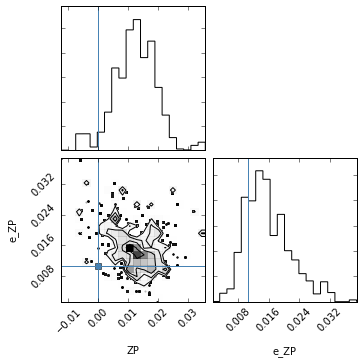

In [10]:
# do corner plot to check errors
burnin = 300
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
perc = np.percentile(samples, [16, 50, 84], axis=0)
print "MCMC guess:"
for i, l in enumerate(labels):
    print "%s: %f (%f, %f)" % (l, perc[1, i], perc[0, i], perc[2, i])
ZPfinal = perc[1, 0]
e_ZPfinal = perc[1, 1]
fig = corner.corner(samples, labels = labels, truths = [ZPguess, e_ZPguess])